# Patients No_Show Appointment Dataset
#### by Nwangene Sobe-Olisa Andrew

### Table of Content
* [Introduction](#introduction)
* [Data Wrangling](#data-wrangling)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Predictive Analysis](../script/show_prediction.ipynb)
* [Presentation](#conclusions)

## Introduction
Following the description in the accompanying README file, this project is aimed at analyzing medical appointment data from state sources in Brazil with the aims of finding out variables that most influence the chances of a patient showing up for an appointment and finally building a model that will predict with a great deal of accuracy the possibility of a patient showing up for an appointment when smiliar( in terns of indepedent variables) variables are presented. The project is divided into subcatgorizes as seen in the table of content. In this introduction section, i'll introduce the dataset, assessing it's characteristics and contents.
Firstly, let's import the neccessary packages for this project:

In [55]:
#importing packages for this project and set plots to be embedded inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as snb 
%matplotlib inline 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

#loading the dataset into pandas dataframe
appointment = pd.read_csv('../data/noshowappointments-kagglev2-may-2016.csv')
appointment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


A look at the output shows that the dataset has 14 columns and 110,527 rows. Column description is as follows:
### Dataset Description 
* `Patient_ID` is the unique Identifier for each patient.
* `Appointment_ID` is the unique appointment identifier.
* `Gender` records the gender of the applicant
* `Scheduled_Day` tells us on what day the patient set up their appointment.
* `appointment_Day` tells us the appointment date.
* `Neighborhood` indicates the location of the hospital.
* `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program.
* `Hipertension` indicates if the applicant is hypertensive or not.
* `Diabetes` indicates the applicants diabetes status.
* `Alcoholism` indicates the applicants alcohol use.
* `Handcap` indicates the applicants physical attributes.
* `SMS_received` indicates if the applicant received a message reminder for the appointment.
* `No_show` records the outcomes of the appointment. This is the dependent or target variables
> The goal of this analysis is to observe variables and how they affect the possibility that a patient shows up for an appointment or not. Along the way, we'll look at the independent variables, individually or collectively, to ascertain their importance to the dependent variable(No Show). The relationships will be presented in a slide and also used in a predictive analysis. 

Next, having imported the neccessary packages and the dataset, let's assess and clean up the data in the [Data Wrangling](#data-wrangling) section.


# Data Wrangling
### Data Assessing
Let's assess the dataset, checking for data quality and inconsistency issues.

In [56]:
# randomly view for rows of data from the dataset
appointment.sample(n=4)#.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
8318,8.213875e+14,5717725,F,2016-05-19T08:18:34Z,2016-05-25T00:00:00Z,30,SANTA TEREZA,0,0,0,0,0,1,Yes
80694,1.753568e+13,5690473,M,2016-05-12T10:06:11Z,2016-05-12T00:00:00Z,19,JARDIM DA PENHA,0,0,0,0,0,0,No
69406,9.572826e+12,5627224,F,2016-04-27T09:11:54Z,2016-05-03T00:00:00Z,23,PIEDADE,0,0,0,0,0,1,Yes
103602,5.224891e+10,5670184,F,2016-05-06T13:15:58Z,2016-06-06T00:00:00Z,18,JESUS DE NAZARETH,0,0,0,0,0,0,Yes


In [57]:
print(f'Dataset size: {appointment.shape}')# returns the number of rows and columns in dataframe
print('#' *70) # to separate the different outputs
print(f' Number of unique Values: {appointment.nunique()}')# returns number of unique values in each column
print('#' *70) # to separate the different outputs.
print(f' Number of null values in each column: {appointment.isnull().sum()}')# returns sum of null values in each column

Dataset size: (110527, 14)
######################################################################
 Number of unique Values: PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64
######################################################################
 Number of null values in each column: PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [58]:
# checking for duplicates in columns
appointment.duplicated().sum()

0

In [59]:
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [60]:
appointment.describe(include=['O'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


These cell blocks above have shown the different data quality issues plaquing the datasets. A large chunck of the dataset have categorical values and as such should have categorical datatypes. The dataset seems to have no Null values but the minimum age shows '-1', which is an obvious erroneous data. This correction, data type unconformity, column names not in line with PEP 8 standards and finally irrelevant columns (patient_Id and Appiontment_id) will be fixed next.

### Data Cleaning
First, we create a copy of the dataset. Working with a copy of the dataset is best practice as it allows the original dataset retain it's original structure.
Here, i'll:

1)1) Changing column names to match PEP 8 standards.

2) Changing 'Scheduled_day' and 'Appointment_day' datatypes to match their content.

3) extracting day and month columns from them

4) Removal of irrelevant datasets like 'Patient_Id' and 'Appointment_Id'.

5) Then fixing the issue of '-1' as the min age in the 'Age' column.

6) Let's change the 'No_show' column content from 'yes','no' to '1','0'. This will make for easy computation. 

In [61]:
df = appointment.copy()

In [62]:
# changing column names
# i'll be renaming the 'No_show' column to Show. 
labels =['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_day', 'Appointment_day', 'Age', 'Neighbourhood', 
'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show']
df = pd.read_csv('../data/noshowappointments-kagglev2-may-2016.csv', header=0, names=labels)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
#changing Scheduled_day and Appointment_day datatype to timestamps
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'])
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'])

# removing the time in the datetime column ('Scheduled_day') to match the 'Appointment_day' column
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'].dt.date)
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'].dt.date)

# Extracting the 'Year','Month' and 'day' from Date Column.
df['scheduled_month'] = df['Scheduled_day'].dt.month_name()
df['scheduled_day'] = df['Scheduled_day'].dt.day_name()

df['appointment_month'] = df['Appointment_day'].dt.month_name()
df['appointment_day'] = df['Appointment_day'].dt.day_name()
print(df.dtypes)

df.head()

Patient_ID                  float64
Appointment_ID                int64
Gender                       object
Scheduled_day        datetime64[ns]
Appointment_day      datetime64[ns]
Age                           int64
Neighbourhood                object
Scholarship                   int64
Hipertension                  int64
Diabetes                      int64
Alcoholism                    int64
Handcap                       int64
SMS_received                  int64
Show                         object
scheduled_month              object
scheduled_day                object
appointment_month            object
appointment_day              object
dtype: object


,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday,April,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday,April,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday,April,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday,April,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday,April,Friday


In [64]:
# replacing the month and day columns with interger values as this is an ML project
df.scheduled_month.replace(to_replace=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
'September', 'October', 'November', 'December'], value=[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df.scheduled_day.replace(to_replace=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'],
value=['1', '2', '3', '4', '5', '6', '7'], inplace=True)
df.appointment_month.replace(to_replace=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
'September', 'October', 'November', 'December'], value=[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df.appointment_day.replace(to_replace=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'],
value=['1', '2', '3', '4', '5', '6', '7'], inplace=True)

df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,6,4,6
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,6,4,6
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,6,4,6
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,6,4,6
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,6,4,6


In [65]:
# changing strings value ('yes','no') in 'No_show to int values ('0','1')
# with this, every '1' value in the 'show' dataset indicates that the patient showed up
# and '0' means the patient didnt.

df['Show'].replace(to_replace=['Yes', 'No'], value=[0,1], inplace=True)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6


Finally, to fix the min Age error. I'll have to identify the row with '-1' as it's value and drop it from the dataset. To identify this row, i'll have to query the 'age' dataset for that value.

In [66]:
# dropping the erroneous Age data
df = df[df['Age'] >= 0]

In [67]:
# to remove the irrelevant columns
df.drop(['Appointment_day', 'Scheduled_day', 'Patient_ID', 'Appointment_ID'], axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6


## Feature Engineering
Having dealt with the data quality and tirdiness issues, a bit of feature engineering will be needed since creating a machine learning model is part of the analysis objectives. For this, i'll turn the neigborhood variable into numbers and then group the neigborhood into 8. This will come in handy in model building and training.

In [68]:
pd.options.display.max_columns = None

In [69]:
# working on the neigbhorhood column
neigbhorhood=pd.get_dummies(df.Neighbourhood, drop_first=True)
neigbhorhood

,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,CENTRO,COMDUSA,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DE LOURDES,DO CABRAL,DO MOSCOSO,DO QUADRO,ENSEADA DO SUÁ,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,FRADINHOS,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,HORTO,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO BOI,ILHA DO FRADE,ILHA DO PRÍNCIPE,ILHAS OCEÂNICAS DE TRINDADE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,MORADA DE CAMBURI,MÁRIO CYPRESTE,NAZARETH,NOVA PALESTINA,PARQUE INDUSTRIAL,PARQUE MOSCOSO,PIEDADE,PONTAL DE CAMBURI,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CECÍLIA,SANTA CLARA,SANTA HELENA,SANTA LUÍZA,SANTA LÚCIA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
neigbhorhood.columns

Index(['ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
       'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM',
       'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO',
       'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO',
       'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE',
       'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA',
       'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA',
       'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE',
       'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR',
       'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO',
       'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA',
       'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI',
       'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBL

#### Neighborhoods 
In the following code, i'll group the #neighborhood category into 8, according to the list below:
* neighborhood_1 = [ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
       'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM',
       'CARATOÍRA', 'CENTRO']
* neighborhood_2 = ['COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO',
       'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO',
       'DO QUADRO', 'ENSEADA DO SUÁ']
* neighborhood_3 = ['ESTRELINHA', 'FONTE GRANDE',
       'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA',
       'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA']
* neighborhood_4 = [ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE',
       'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR',
       'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH']
* neighborhood_5 = ['JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO',
       'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA']
* neighborhood_6 = ['PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI',
       'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA',
       'RESISTÊNCIA', 'ROMÃO']
* neighborhood_7 = ['SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA',
       'SANTA LUÍZA', 'SANTA LÚCIA', 'SANTA MARTHA', 'SANTA TEREZA',
       'SANTO ANDRÉ', 'SANTO ANTÔNIO', 'SANTOS DUMONT']
* neighborhood_8 = ['SANTOS REIS',
       'SEGURANÇA DO LAR', 'SOLON BORGES', 'SÃO BENEDITO', 'SÃO CRISTÓVÃO',
       'SÃO JOSÉ', 'SÃO PEDRO', 'TABUAZEIRO', 'UNIVERSITÁRIO', 'VILA RUBIM']

In [71]:
# grouping the reason neigbhorhood data
neigbhorhood_1 = neigbhorhood.iloc[:, :11].max(axis=1)
neigbhorhood_2 = neigbhorhood.iloc[:, 11:21].max(axis=1)
neigbhorhood_3 = neigbhorhood.iloc[:, 21:31].max(axis=1)
neigbhorhood_4 = neigbhorhood.iloc[:, 31:41].max(axis=1)
neigbhorhood_5 = neigbhorhood.iloc[:, 41:51].max(axis=1)
neigbhorhood_6 = neigbhorhood.iloc[:, 51:61].max(axis=1)
neigbhorhood_7 = neigbhorhood.iloc[:, 61:71].max(axis=1)
neigbhorhood_8 = neigbhorhood.iloc[:, 71:].max(axis=1)

In [72]:
# joining the dataframes together
df = pd.concat([df, neigbhorhood_1, neigbhorhood_2, neigbhorhood_3, neigbhorhood_4, neigbhorhood_5, neigbhorhood_6, neigbhorhood_7, neigbhorhood_8], axis=1)
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day,0,1,2,3,4,5,6,7
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,1,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,0,1,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,1,5,3,6,3,0,0,0,0,1,0,0,0
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,1,5,3,6,3,0,0,0,0,1,0,0,0
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,1,4,4,6,3,0,0,0,0,1,0,0,0
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,1,4,4,6,3,0,0,0,0,1,0,0,0


Next, we categorize the age variable according to generations. This makes for easy computing.

In [73]:
#using pandas_cut function 
#create the bin_edges that will be used to cut the data into groups.
bin_edges = [-1.0, 22, 38.0, 54.0, 115.0]

#create labels for the new categories.
# 1 (Gen_Z+), 2 (Milennials), 3 (Gen_X), 4 (Bloomers+)
bin_names = ['1', '2', '3', '4']

# puting the pandas_cut function to use
df['age_groups'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

#drop age column
# # checks for the successful creation of 'Age_group' column
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day,0,1,2,3,4,5,6,7,age_groups
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,1,0,0,0,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,0,1,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4


In [74]:
df.columns.values

array(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show',
       'scheduled_month', 'scheduled_day', 'appointment_month',
       'appointment_day', 0, 1, 2, 3, 4, 5, 6, 7, 'age_groups'],
      dtype=object)

In [75]:
# renaming the columns
column_names = ['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'show',
       'scheduled_month', 'scheduled_day', 'appointment_month',
       'appointment_day', 'neigbhorhood_1', 'neigbhorhood_2', 'neigbhorhood_3', 
       'neigbhorhood_4', 'neigbhorhood_5', 'neigbhorhood_6', 'neigbhorhood_7', 'neigbhorhood_8', 'age_groups']

df.columns = column_names
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month,scheduled_day,appointment_month,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8,age_groups
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,1,0,0,0,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,0,1,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4


In [76]:
df.drop(['neighbourhood', 'age'], axis = 1, inplace = True)

In [77]:
df.head()

,gender,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month,scheduled_day,appointment_month,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8,age_groups
0,F,0,1,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4
1,M,0,0,0,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4
2,F,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,1,0,0,0,4
3,F,0,0,0,0,0,0,1,4,6,4,6,0,0,0,0,0,1,0,0,1
4,F,0,1,1,0,0,0,1,4,6,4,6,0,0,0,1,0,0,0,0,4


In [78]:
df.dtypes

gender                 object
scholarship             int64
hypertension            int64
diabetes                int64
alcoholism              int64
handicap                int64
sms_received            int64
show                    int64
scheduled_month         int64
scheduled_day          object
appointment_month       int64
appointment_day        object
neigbhorhood_1          uint8
neigbhorhood_2          uint8
neigbhorhood_3          uint8
neigbhorhood_4          uint8
neigbhorhood_5          uint8
neigbhorhood_6          uint8
neigbhorhood_7          uint8
neigbhorhood_8          uint8
age_groups           category
dtype: object

## Exploratory Data Analysis
Here, I'll be using python powerful tools like: pandas, numpy, matplotlib to run analysis, find patterns and visualize relationships with the goal of addressing the research questions. Recall that this dataset can be classed into two(2), the dependent variable (Show) and the independent variables (Dataset - show). Let's see how this independent variables correlate with dependent variable(Show):

In [79]:
# drawing a correlation chart of the variables
df[['age_groups', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 
'sms_received', 'show', 'scheduled_month', 'appointment_month', 'scheduled_day', 
'appointment_day']].corr().style.background_gradient(cmap='coolwarm')

,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month,appointment_month
scholarship,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,0.016817,-0.002583
hypertension,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,0.025000,0.003786
diabetes,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,0.025600,0.003745
alcoholism,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,0.028774,0.003922
handicap,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,0.014955,-0.001477
sms_received,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,-0.294083,0.108082
show,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,0.160856,0.020879
scheduled_month,0.016817,0.025000,0.025600,0.028774,0.014955,-0.294083,0.160856,1.000000,0.527615
appointment_month,-0.002583,0.003786,0.003745,0.003922,-0.001477,0.108082,0.020879,0.527615,1.000000


This correlation chart shows some correlation between the variables. Scheduled month appears to have the best(though weak) correlation to the dependent variable amongst the indpendent variables. Also, Age, hypertension and diabetes has a good correlation amongst each other. We'll breakdown this correlations in the subsequent cells.

1) What is the spread of the dependent variable. Knowing this will be of great importance when building a model off the dataset. A suitable dataset for model development should have a reasonable amount of both outcomes of the dependent variable, that way, the model can perform well in both scenario.

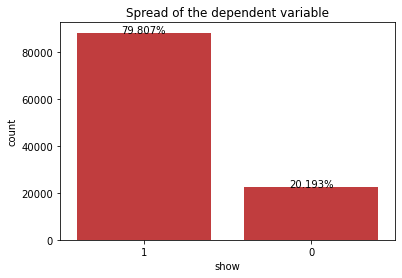

In [80]:
ax = snb.countplot(data = df, x = 'show',  color= snb.color_palette()[3], order = df.show.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('show')
plt.title('Spread of the dependent variable')
plt.show()

Fair enough, 79% of the patients showed up for an appointment while 20% didn't.

### 2) How does funding affect the chances of a patient showing up for an appointment?

The dataframe shows that some patients got funding whilst other didn't. We are going to see how 'scholarship' affects the turn up (Show') level of patients. To achieve this, first we group 'Scholarship' dataset and 'No_show' dataset. Then calculate for the mean values.  

In [81]:
# firstly, let's create a function for 2 variables analysis as these will be done often
def group(df, col_1, col_2):
    df_c = df.groupby(col_1)[col_2].mean()
    return df_c

# grouping 'scholarship' and 'Show' and finding the sum of 'show' based on 'Scholarship'
group(df, 'scholarship', 'show')

scholarship
0    0.801926
1    0.762637
Name: show, dtype: float64

This pivot table shows that government scholarship on it's own doesn't result to more patients attending appointments, as 80% of patients with no scholarship showed up while only 76% of those with scholarship did. This means that patients on scholarship that didn't attend (24%) is more than patients without scholarship that didn't attend (<20%).

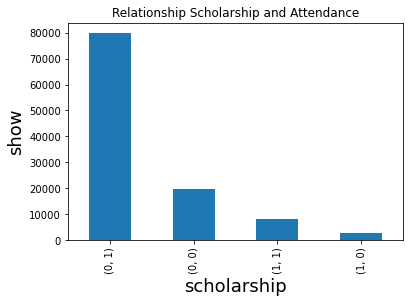

In [82]:
# to reduce code repetitions, a function will be created 
# to be called on for bivariant plots.
df_s = df.groupby('scholarship')['show'].value_counts()
def plot(df, xlabel, ylabel, title):
    df.plot(kind='bar', title=title)
    plt.xlabel("{}".format(xlabel), fontsize=18)
    plt.ylabel("{}".format(ylabel), fontsize=18)
    plt.legend;
    plt.show()

plot(df_s, 'scholarship', 'show', 'Relationship Scholarship and Attendance')

where:
* (0,1) = No scholarship Attendees
* (0,0) = No scholarhip None Attendees
* (1,0) = Scholarship None attendees
* (1,1) = Scholarship Attendees.

### 2) Since money isn't an important factor, could it be prevalent medical condition ?
Let's see how patients with any medical conditions reacted to their medical appointment.

In [83]:
print(group(df, 'hypertension', 'show'))
print('#' * 50)
print(group(df, 'diabetes', 'show'))
print('#' * 50)
print(group(df, 'handicap', 'show'))
print('#' * 50)
print(group(df, 'alcoholism', 'show'))

hypertension
0    0.790961
1    0.826980
Name: show, dtype: float64
##################################################
diabetes
0    0.796370
1    0.819967
Name: show, dtype: float64
##################################################
handicap
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: show, dtype: float64
##################################################
alcoholism
0    0.798052
1    0.798512
Name: show, dtype: float64


The pivot tables above shows that patients with any of the illness(except alcoholism; if that can be considered as an illness) above has a higher chance of showing up for an appointment than their counterparts without any. So, it shows that having any of the above health challenge is a factor in this analysis. It's also important to note that handicap 4 has a lower average of showing up than other forms of handicap and those without handicap( an eplanation of what these handicaps are can't be accertained at the moment, but my guess is that this has something to do with the patients mobility). Patients with handicap 2 or 3 has a higher chance of showing up for an appointment. Next, we'll consider the residential area of the patients as contained in `neighborhood` columns. 

In [84]:
print(group(df, 'neigbhorhood_1', 'show'))
print('#' * 50)
print(group(df, 'neigbhorhood_2', 'show'))
print('#' * 50)
print(group(df, 'neigbhorhood_3', 'show'))
print('#' * 50)
print(group(df, 'neigbhorhood_4', 'show'))

neigbhorhood_1
0    0.799851
1    0.786952
Name: show, dtype: float64
##################################################
neigbhorhood_2
0    0.796986
1    0.810641
Name: show, dtype: float64
##################################################
neigbhorhood_3
0    0.798247
1    0.796198
Name: show, dtype: float64
##################################################
neigbhorhood_4
0    0.798849
1    0.795419
Name: show, dtype: float64


In [85]:
print(group(df, 'neigbhorhood_5', 'show'))
print('#' * 50)
print(group(df, 'neigbhorhood_6', 'show'))
print('#' * 50)
print(group(df, 'neigbhorhood_7', 'show'))
print('#' * 50)
print(group(df, 'neigbhorhood_8', 'show'))

neigbhorhood_5
0    0.797873
1    0.799545
Name: show, dtype: float64
##################################################
neigbhorhood_6
0    0.798407
1    0.795536
Name: show, dtype: float64
##################################################
neigbhorhood_7
0    0.797233
1    0.804227
Name: show, dtype: float64
##################################################
neigbhorhood_8
0    0.797272
1    0.804322
Name: show, dtype: float64


These two cells shows that patients from some places (neighborhoods 2,5,7,8) have a higher chance of showing up for an appointment than others, with neigbhorhood 2 having the highest percentage(81%). 
> So now we have some independent variables that have an effect on the possibility of a show up (aliments and Neigbhorhood 2,5,7,8), lets consider other independent variables.

In [86]:
df.columns.values

array(['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism',
       'handicap', 'sms_received', 'show', 'scheduled_month',
       'scheduled_day', 'appointment_month', 'appointment_day',
       'neigbhorhood_1', 'neigbhorhood_2', 'neigbhorhood_3',
       'neigbhorhood_4', 'neigbhorhood_5', 'neigbhorhood_6',
       'neigbhorhood_7', 'neigbhorhood_8', 'age_groups'], dtype=object)

In [87]:
print(group(df, 'gender', 'show'))
print('#' * 50)
print(group(df, 'age_groups', 'show'))
print('#' * 50)
print(group(df, 'scheduled_month', 'show'))
print('#' * 50)
print(group(df, 'sms_received', 'show'))

gender
F    0.796851
M    0.800321
Name: show, dtype: float64
##################################################
age_groups
1    0.775003
2    0.771165
3    0.803874
4    0.842373
Name: show, dtype: float64
##################################################
scheduled_month
1     0.700000
2     0.708185
3     0.669065
4     0.690240
5     0.825440
6     0.899193
11    1.000000
12    0.688525
Name: show, dtype: float64
##################################################
sms_received
0    0.832965
1    0.724255
Name: show, dtype: float64


* Interestly, this pivot tables shows that male are more likely to show up then females and as patients age, the higher the chance of them showing up for an appointment(expect for milennials whom normally assume to be healthiest).
* The scheduled month also brings an interesting information, appointment scheduled on the 5,6 and 11th month show great chance of a show up(>80%), while 3rd, 4th and 12th month are the least. Interestly, every event scheduled by the 11th month of the year experienced a 100% turn up and that's because only one patienthas an event on that month as seen in the query below. Also note that no data for months 7-10.
* Apparently, notifying patients of an appointment doesn't improve the chance of the patient showing up for the appointment. Actually patients who didn't receive and sms showed up more than those who did( maybe it has to do with when the text was sent).

In [88]:
#query for data scheduled on the 11th month of the year
df.query('scheduled_month == "11"')

,gender,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month,scheduled_day,appointment_month,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8,age_groups
3764,F,0,0,0,0,0,1,1,11,3,5,4,0,0,0,0,0,1,0,0,3


In [89]:
# pivot tables for appointment_day, scheduled_day, appointment_month and how they relate to showing up 
print(group(df, 'appointment_day', 'show'))
print('#' * 50)
print(group(df, 'scheduled_day', 'show'))
print('#' * 50)
print(group(df, 'appointment_month', 'show'))

appointment_day
2    0.793519
3    0.799064
4    0.803108
5    0.806459
6    0.787739
7    0.769231
Name: show, dtype: float64
##################################################
scheduled_day
2    0.802417
3    0.797806
4    0.798904
5    0.795275
6    0.794502
7    0.958333
Name: show, dtype: float64
##################################################
appointment_month
4    0.804328
5    0.792135
6    0.815425
Name: show, dtype: float64


* Here, we can notice that the first day of the week(Sundays) aren't recorded, most likely cause Brazil is a religious country, so no appointments and scheduling calls on that day. 
* Furthermore,it's observed that appointments for the 4th and 5th days of the week see a higher show rate(>80%), while scheduling days of 2nd and 7th (representing Monday and Saturday) recorded the highest rate of showing up with saturday having the highest 95%. Querrying the scheduled_day for 'saturday' shows about 24 patients under this class. Why is saturday having such a high turn out? more data is needed.
* Also, on the appointment month variable, it shows that 4th and 6th month of the year has an increasing percentage of showing up.

In [112]:
# querrying scheduledday column for saturday.
df.query('scheduled_day == "7"').shape

(24, 14)

In [91]:
df.columns

Index(['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism',
       'handicap', 'sms_received', 'show', 'scheduled_month', 'scheduled_day',
       'appointment_month', 'appointment_day', 'neigbhorhood_1',
       'neigbhorhood_2', 'neigbhorhood_3', 'neigbhorhood_4', 'neigbhorhood_5',
       'neigbhorhood_6', 'neigbhorhood_7', 'neigbhorhood_8', 'age_groups'],
      dtype='object')

So, we now know variables that effect the ability of patients to show up, namely:
* Diabetes
* Hypertension
* Handicap
* Neigbhorhood_2
* Neigbhorhood_5
* Neigbhorhood_7
* Neigbhorhood_8

And we've also seen some insights into how the dependent column(show) reacts across the different categories in:
* scheduled_month
* appointment_month
* scheduled_day
* appointment_day
* age_groups 
> Next, let's draw up tables for two independent variables (with internal categories) and the dependent variable starting with diabetes:

In [92]:
# pivot table for 'age group', 'diabetes' against 'show'
da_pivot = pd.crosstab(index=df["age_groups"], columns=df["diabetes"], values=df["show"], aggfunc=np.mean)
da_pivot

diabetes,0,1
age_groups,,
1,0.775167,0.701299
2,0.771129,0.773333
3,0.804012,0.802148
4,0.845391,0.830129


Interestly, diabetics across all age groups are less likely to show up than non-diabetics(excepts for a slight increase in milennials). Recall that we earlier established that diabetics are more likely to show than non-diabetics, but it appears this uptick by diabetics has nothing to do with age. Let's compare across other factors.

In [93]:
# pivot table between neigbhorhood_2 and diabetes against show
nd_pivot = pd.crosstab(index=df["neigbhorhood_2"], columns=df["diabetes"], values=df["show"], aggfunc=np.mean)
nd_pivot

diabetes,0,1
neigbhorhood_2,,
0,0.795180,0.820806
1,0.810492,0.812176


Surprisingly, diabetics not living in 'neighborhood 2' are slightly more likely to show up then those living in neighborhood 2. These means that the uptick in show up level for neighborhood 2 patients doesn't involve diabetics therein.  

In [94]:
# pivot table between neigbhorhood_5 and diabetes against show
pivot_nd_5 = pd.crosstab(index=df["neigbhorhood_5"], columns=df["diabetes"], values=df["show"], aggfunc=np.mean)
pivot_nd_5

diabetes,0,1
neigbhorhood_5,,
0,0.796276,0.817371
1,0.797065,0.855556


In [111]:
# querry for diabetics within neighborhood 5
df.loc[(df['neigbhorhood_5'] == 1) &(df['diabetes'] == 1), :].shape

(540, 14)

There seem to be a large jump in show up level for diabetics living within neighborhood 5 and this is more interesting giving that over 500 patients fall under this class, so its not a case of limited data.

In [96]:
# # pivot table between neigbhorhood_7 and diabetes against show
pivot_nd_7 = pd.crosstab(index=df["neigbhorhood_7"], columns=df["diabetes"], values=df["show"], aggfunc=np.mean)
pivot_nd_7

diabetes,0,1
neigbhorhood_7,,
0,0.795698,0.817661
1,0.801431,0.833773


In [97]:
# pivot table between neigbhorhood_8 and diabetes against show
pivot_nd_8 = pd.crosstab(index=df["neigbhorhood_8"], columns=df["diabetes"], values=df["show"], aggfunc=np.mean)
pivot_nd_8

diabetes,0,1
neigbhorhood_8,,
0,0.795673,0.818785
1,0.802002,0.826873


In [98]:
pivot_nd_8 = pd.crosstab(index=df["diabetes"], columns=df["appointment_month"], values=df["show"], aggfunc=np.mean)
pivot_nd_8

appointment_month,4,5,6
diabetes,,,
0,0.802271,0.790530,0.813557
1,0.829876,0.813131,0.838776


Diabetics are more likely to show up for an appointment than non-diabetics across all appointment month. And Diabetics in appointment_month 6 recorded more show ups, with months 4 & 5 next in line respectively.

In [99]:
pivot_ds = pd.crosstab(index=df["diabetes"], columns=df["scheduled_month"], values=df["show"], aggfunc=np.mean)
pivot_ds

scheduled_month,1,2,3,4,5,6,11,12
diabetes,,,,,,,,
0,0.679245,0.729839,0.667545,0.687406,0.824698,0.899194,1.0,0.653846
1,0.857143,0.545455,0.695000,0.735196,0.834510,0.899175,NaN,0.888889


Diabetics within scheduled months 2 and 3 are less likely to show up than non-diabetics within same period.

In [113]:
# querrying the second scheduled month with diabetes.
df.loc[(df['scheduled_month'] == 2) &(df['diabetes'] == 1), :].shape

(33, 14)

In [101]:
pivot_ds = pd.crosstab(index=df["diabetes"], columns=df["scheduled_day"], values=df["show"], aggfunc=np.mean)
pivot_ds

scheduled_day,2,3,4,5,6,7
diabetes,,,,,,
0,0.801510,0.796574,0.795965,0.793597,0.792727,1.000000
1,0.814382,0.812719,0.840273,0.815847,0.817708,0.666667


Generally, regarding scheduled day and diabetes, the fourth month(May), has the highest turn up and there's a sharp decline in the last month.

In [102]:
pivot_ds = pd.crosstab(index=df["diabetes"], columns=df["appointment_day"], values=df["show"], aggfunc=np.mean)
pivot_ds

appointment_day,2,3,4,5,6,7
diabetes,,,,,,
0,0.793691,0.795624,0.801314,0.804538,0.786398,0.781250
1,0.791216,0.842667,0.826754,0.832086,0.803828,0.714286


There's a general increase in show ups across appointment days for diabetics when compared to non-diabetics except for saturdays(7th day)

> Next, we'll look at Hypertension and other multi-categorical independent variables in relation to the dependent variable.

In [103]:
print(pd.crosstab(index=df["hypertension"], columns=df["age_groups"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["scheduled_month"], values=df["show"], aggfunc=np.mean))


age_groups           1         2         3         4
hypertension                                        
0             0.775138  0.769609  0.800210  0.850232
1             0.714286  0.796816  0.815495  0.834752
scheduled_month        1         2         3         4         5         6   \
hypertension                                                                  
0                0.655172  0.711340  0.664003  0.679453  0.820036  0.896137   
1                0.741935  0.701149  0.693944  0.739369  0.846654  0.911287   

scheduled_month   11        12  
hypertension                    
0                1.0  0.833333  
1                NaN  0.653061  


* The first pivot table shows that Gen Z and Bloomers without hypertension are more likely to show up than milennials with hypertension whereas, milennials and Gen X with hypertension showed a higher show up level.
* For hypertension and scheduled_month, except for month two, hypertensive patients are more likely to show up than non_hypertensive patients across all month (except month 2)

In [104]:
print(pd.crosstab(index=df["hypertension"], columns=df["neigbhorhood_2"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["neigbhorhood_5"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["neigbhorhood_7"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["neigbhorhood_8"], values=df["show"], aggfunc=np.mean))


neigbhorhood_2         0         1
hypertension                      
0               0.790085  0.801991
1               0.825940  0.836199
neigbhorhood_5         0         1
hypertension                      
0               0.790799  0.792073
1               0.824805  0.857339
neigbhorhood_7         0         1
hypertension                      
0               0.790393  0.795321
1               0.825700  0.835206
neigbhorhood_8         0         1
hypertension                      
0               0.790377  0.795892
1               0.826444  0.830275


* Hypertensive patients from neighborhood 5 has the highest show up average.

In [105]:
print(pd.crosstab(index=df["hypertension"], columns=df["appointment_month"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["appointment_day"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["scheduled_month"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["scheduled_day"], values=df["show"], aggfunc=np.mean))


appointment_month         4         5         6
hypertension                                   
0                  0.796409  0.785314  0.807603
1                  0.837925  0.819976  0.846825
appointment_day         2         3         4         5         6         7
hypertension                                                               
0                0.787328  0.791799  0.796072  0.798461  0.780507  0.750000
1                0.819362  0.828104  0.832176  0.838235  0.817164  0.789474
scheduled_month        1         2         3         4         5         6   \
hypertension                                                                  
0                0.655172  0.711340  0.664003  0.679453  0.820036  0.896137   
1                0.741935  0.701149  0.693944  0.739369  0.846654  0.911287   

scheduled_month   11        12  
hypertension                    
0                1.0  0.833333  
1                NaN  0.653061  
scheduled_day         2         3         4         5  

* Hypertensives with appointment month in May has the least show up average, while month 6 (June) has the highest.
* Hypertensives with appointment day on saturday has the least show up average when compared to other days and Thursdays have the highest show up average.
* Hypertensives that made schedule arrangment on the 6th month (June) has the highest show up average, while March has the lowest.

In [106]:
print(pd.crosstab(index=df["diabetes"], columns=df["gender"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["hypertension"], columns=df["gender"], values=df["show"], aggfunc=np.mean))
print(pd.crosstab(index=df["handicap"], columns=df["gender"], values=df["show"], aggfunc=np.mean))


gender           F         M
diabetes                    
0         0.795012  0.798845
1         0.818587  0.823278
gender               F         M
hypertension                    
0             0.788726  0.794880
1             0.826781  0.827453
gender           F         M
handicap                    
0         0.796581  0.799634
1         0.816257  0.826945
2         0.761905  0.846154
3         1.000000  0.700000
4         0.000000  1.000000


In [107]:
df.drop(['scholarship', 'alcoholism', 'sms_received', 'neigbhorhood_1', 
'neigbhorhood_3', 'neigbhorhood_3', 'neigbhorhood_4', 'neigbhorhood_6'], axis=1, inplace=True)

df.to_csv('../data/enhanced.csv', index=False)

## Conclusions

From the analysis done through the questions answered, it shows the following:
a) Of the numerous independent variables collected, only:
* `Gender`   *`Age`      * `Diabetes`      * `Hypertension`    * `Handicap`    *`Neighborhoods(2,5,7,8)`
* `scheduled_month`     *`appointment_month`         *` scheduled_day `             * `appointment_day` has a postive effect on the dependent variable(show)

b) For the Gender variable, Males are slightly more likely to show up than females irrespective of their health status(diabetics, hypertensive or handicap). We noticed a sharp jump when looking at patients with type 2 handicap(more than the normal difference)

c) As regrads to age, there's a general progression in the likely to keep to an appointment as we moved from Gen_z to bloomers, although there was a dip with the milennials.

d) Of all the medical history recorded, alcoholism are the least likely to show up while the hypertensive are the most likely. Diabetics and handicapped came in second and third respectively.With the same noticed low turn up with patients on type 2 handicap.

e) Scholarship and SMS isn't a factor in determining patients show up, as patients without government funding and didn't receive a notification where more likely to show up.

f) Patients in Neighborhoods 2,5,7,8 has a higher show up rate than other neighborhoods(which actual showed a decline in show rate), with [neighborhood 2](####neighborhoods) having the highest. Furthermore, it's observed that debatics in neighborhood 2 are less likely to show up than diabetics in other 3 neighborhoods (5,7,8), so the high show up for patients in neighborhood 2 doesn't include the diabetics amongst them.

### Limitations
1) Dropping values due to errors can always skew analysis. Though the number of dropped rows here are minute in comparison to the total data used.

2) I should look to improving my model for better accuracy over the 89% recorded.

3) The data set summaries health conditions in "1" and "0" format, giving no  consideration for different severity of health conditions and this can go a long way in justifying committment to appointment.


In [108]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

[back to top](#patients-no_show-appointment-dataset)